# Módulo 10 tarefa 2

Considere a mesma base de dados utilizada na tarefa 1 ```previsao_de_renda.csv```.

#### Tratamento

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

In [29]:
filepath = 'https://raw.githubusercontent.com/rhatiro/Curso_EBAC-Profissao_Cientista_de_Dados/main/Mo%CC%81dulo%2010%20-%20Descritiva%20II%20-%20Ana%CC%81lise%20descritiva%20para%20resposta%20conti%CC%81nua/database/Profissa%CC%83o-%20Cientista%20de%20Dados_M10_support%20material.csv'
df = pd.read_csv(filepath_or_buffer=filepath)
df.drop(columns=['Unnamed: 0'], inplace=True)
df.head()

,data_ref,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,mau,renda
0,2015-01-01,8682,F,False,True,1,Assalariado,Secundário,Casado,Casa,36,3.575342,3.0,False,3369.24
1,2015-01-01,12830,M,True,True,0,Empresário,Secundário,Casado,Casa,42,0.860274,2.0,False,6096.14
2,2015-01-01,2885,M,True,True,2,Assalariado,Superior completo,Casado,Casa,31,8.065753,4.0,False,5658.98
3,2015-01-01,16168,F,True,False,0,Empresário,Secundário,Casado,Casa,50,1.208219,2.0,False,7246.69
4,2015-01-01,12438,M,False,False,0,Assalariado,Secundário,Casado,Casa,52,13.873973,2.0,False,4017.37


In [30]:
df.shape

(15000, 15)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   data_ref               15000 non-null  object 
 1   index                  15000 non-null  int64  
 2   sexo                   15000 non-null  object 
 3   posse_de_veiculo       15000 non-null  bool   
 4   posse_de_imovel        15000 non-null  bool   
 5   qtd_filhos             15000 non-null  int64  
 6   tipo_renda             15000 non-null  object 
 7   educacao               15000 non-null  object 
 8   estado_civil           15000 non-null  object 
 9   tipo_residencia        15000 non-null  object 
 10  idade                  15000 non-null  int64  
 11  tempo_emprego          12466 non-null  float64
 12  qt_pessoas_residencia  15000 non-null  float64
 13  mau                    15000 non-null  bool   
 14  renda                  15000 non-null  float64
dtypes:

In [32]:
df.isna().sum()

data_ref                    0
index                       0
sexo                        0
posse_de_veiculo            0
posse_de_imovel             0
qtd_filhos                  0
tipo_renda                  0
educacao                    0
estado_civil                0
tipo_residencia             0
idade                       0
tempo_emprego            2534
qt_pessoas_residencia       0
mau                         0
renda                       0
dtype: int64

In [33]:
df.fillna(0, inplace=True)

In [34]:
df['tempo_emprego'].isna().sum()

0

1) Com o que você viu em aula, faça uma análise das variáveis qualitativas (posse de imóvel e posse de veículo) para verificar se são boas preditoras de *renda*. Alguma delas parece discriminar *renda* de forma estatisticamente significante?

#### Posse de imóvel

In [35]:
df_cut_renda = pd.qcut(df['renda'], 4)
df_cut_renda.value_counts()

renda
(159.899, 1945.74]      3751
(1945.74, 3278.26]      3750
(5642.365, 89918.04]    3750
(3278.26, 5642.365]     3749
Name: count, dtype: int64

In [55]:
group = df.groupby([df_cut_renda, 'posse_de_imovel'])['posse_de_imovel'].count().unstack()
group

C:\Users\Gabriel\AppData\Local\Temp\ipykernel_17220\2188519580.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group = df.groupby([df_cut_renda, 'posse_de_imovel'])['posse_de_imovel'].count().unstack()


posse_de_imovel,False,True
renda,,
"(159.899, 1945.74]",1375,2376
"(1945.74, 3278.26]",1178,2572
"(3278.26, 5642.365]",1202,2547
"(5642.365, 89918.04]",1163,2587


C:\Users\Gabriel\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


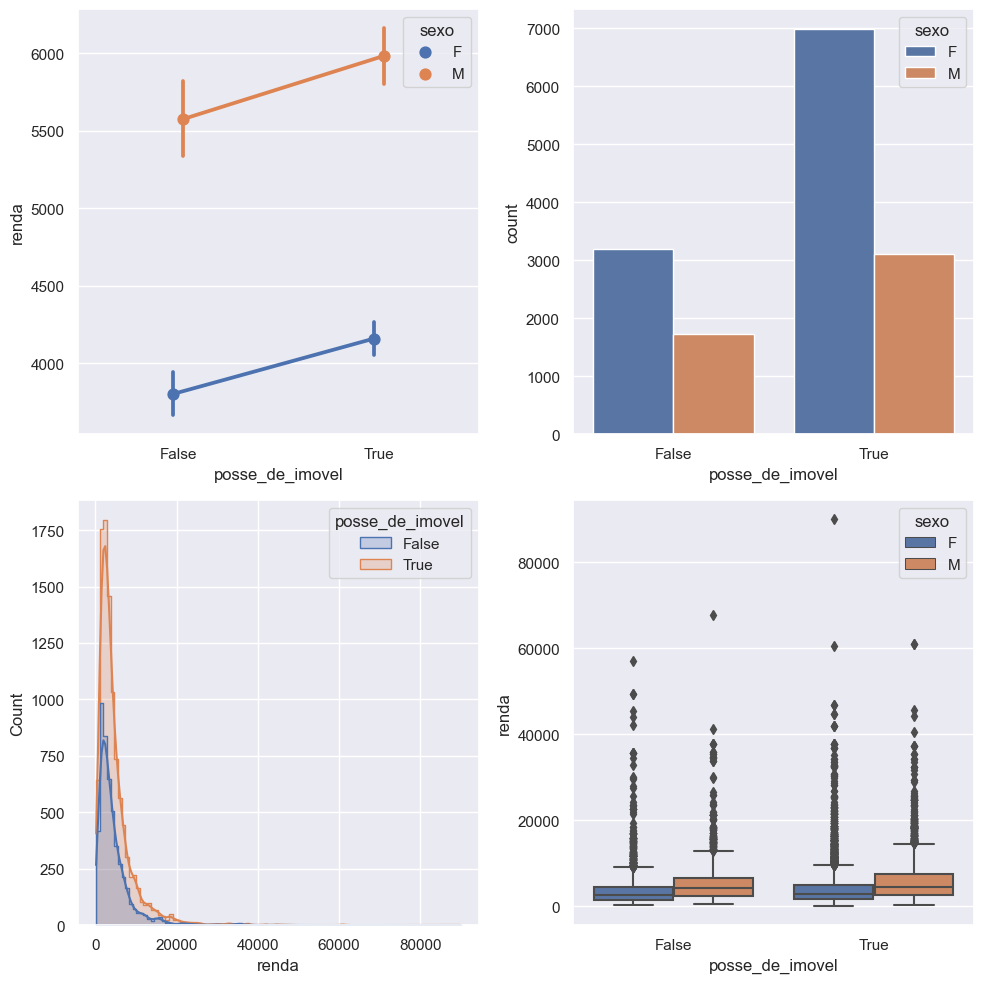

In [73]:
plt.rc('figure', figsize=(10,10))
fig, ax = plt.subplots(2,2)

ax1 = sns.pointplot(ax=ax[0,0], x="posse_de_imovel", y='renda', hue = 'sexo', dodge=True, errorbar=('ci', 95), data=df[['posse_de_imovel', 'renda', 'sexo']])
ax2 = sns.countplot(ax=ax[0,1], x='posse_de_imovel', hue = 'sexo', data=df[['posse_de_imovel', 'renda', 'sexo']])
ax3 = sns.histplot(ax=ax[1,0], alpha=.25, x='renda',hue='posse_de_imovel', bins=100, element ='step', kde=True, data=df)
ax4 = sns.boxplot(ax=ax[1,1], x='posse_de_imovel',y="renda", hue='sexo', data=df[['posse_de_imovel', 'renda', 'sexo']])

plt.tight_layout()

In [ ]:
df[['posse_de_imovel','renda']].corr()

<Axes: >

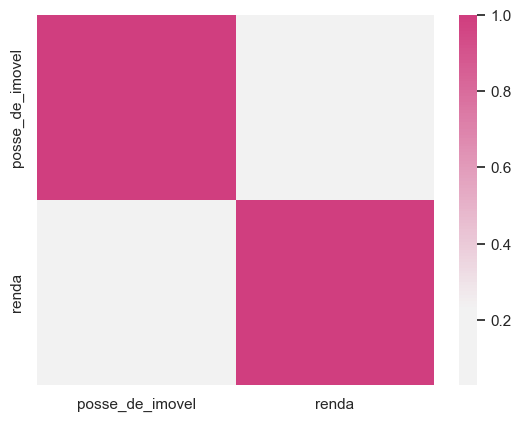

In [13]:
cmap = sns.diverging_palette(h_neg=125, h_pos=350, as_cmap=True, sep=60, center='light')
sns.heatmap(df[['posse_de_imovel','renda']].corr(), center=0, cmap=cmap)

#### Posse de veículo

In [18]:
df.groupby([df_cut_renda, 'posse_de_veiculo'])['posse_de_veiculo'].count().unstack()

C:\Users\Gabriel\AppData\Local\Temp\ipykernel_17220\2550257852.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby([df_cut_renda, 'posse_de_veiculo'])['posse_de_veiculo'].count().unstack()


posse_de_veiculo,False,True
renda,,
"(159.899, 1945.74]",2525,1226
"(1945.74, 3278.26]",2312,1438
"(3278.26, 5642.365]",2246,1503
"(5642.365, 89918.04]",2084,1666


C:\Users\Gabriel\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


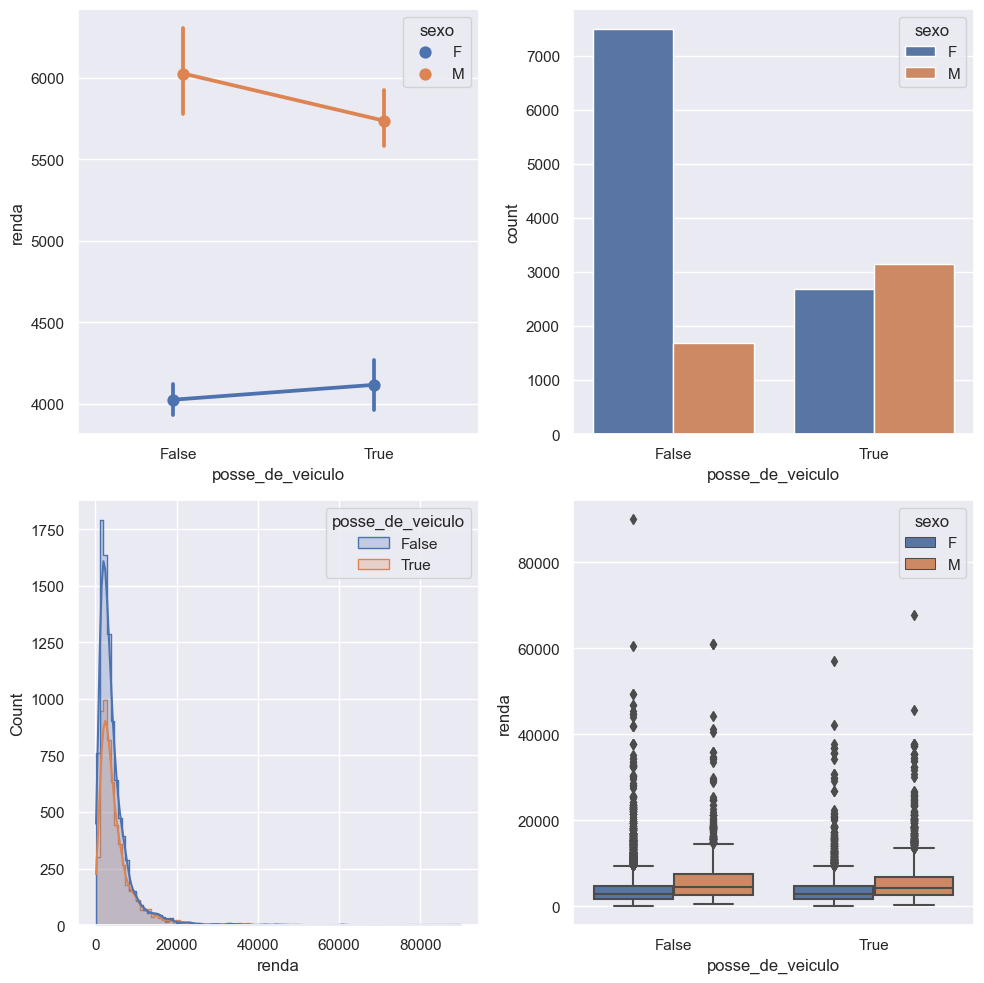

In [75]:
plt.close('all')
plt.rc('figure', figsize=(10,10))
fig, ax = plt.subplots(2,2)

ax1 = sns.pointplot(ax=ax[0,0], x="posse_de_veiculo", y='renda', hue = 'sexo', dodge=True, errorbar=('ci', 95), data=df[['posse_de_veiculo', 'renda', 'sexo']])
ax2 = sns.countplot(ax=ax[0,1], x='posse_de_veiculo', hue = 'sexo', data=df[['posse_de_veiculo', 'renda', 'sexo']])
ax3 = sns.histplot(ax=ax[1,0], alpha=.25, x='renda',hue='posse_de_veiculo', bins=100, element ='step', kde=True, data=df)
ax4 = sns.boxplot(ax=ax[1,1], x='posse_de_veiculo',y="renda", hue='sexo', data=df[['posse_de_veiculo', 'renda', 'sexo']])

plt.tight_layout()

In [16]:
df[['posse_de_veiculo','renda']].corr()

,posse_de_veiculo,renda
posse_de_veiculo,1.000000,0.063414
renda,0.063414,1.000000


<Axes: >

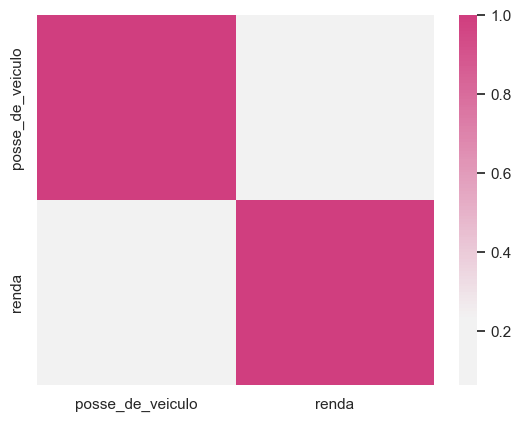

In [14]:
cmap = sns.diverging_palette(h_neg=125, h_pos=350, as_cmap=True, sep=60, center='light')
sns.heatmap(df[['posse_de_veiculo','renda']].corr(), center=0, cmap=cmap)